<a href="https://colab.research.google.com/github/saksham1211/Marketingai_Internship/blob/master/Logo_and_Type_Detection_%5BALL_COMPANIES%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **'LOGO' AND 'TYPE OF FORM' DETECTION**
In this notebook I have implemented the concepts of object detection and loaded the already trained model (YoloV3), which has been trained on the custom dataset(401 K investment companies logo and type of form).

I annotated the images using "LabellImg", and then train the model. In this part of the notebook, we have focussed on the 'detection' part and not on the 'training' part.

*The following notebook contains code only of the detection of logo and the type of form.*

**Input:-** IMAGE [*JPEG*]

**Output:-** *Company Name* [Merrill Lynch, Charles Schwab, Fidelity, American Trade] and  *Type of Form* [IRA, Client Account Transfer Form.....]

**MOUNT YOUR GOOGLE DRIVE HERE**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [12]:
!pip3 install tensorflow-gpu==1.13.1

In [13]:
!pip3 install imageai --upgrade

Requirement already up-to-date: imageai in /usr/local/lib/python3.6/dist-packages (2.1.5)


**Upload your image and copy the path below**

In [0]:
IMAGE_PATH = "/content/charles_edited.jpg"

**In the below cell, you can see** 

detector.setModelPath(copy the model path saved in your G- Drive)

detector.setJsonPath(copy the Json config path saved in your G-Drive)

In [0]:
from imageai.Detection.Custom import CustomObjectDetection

detector = CustomObjectDetection()

detector.setModelTypeAsYOLOv3()

prediction_dictionary= {}
prediction_name=[]
prediction_probab=[]
tick_box_field = []

detector.setModelPath("/content/drive/My Drive/PASCAL_DATASET/models/detection_model-ex-027--loss-0007.398.h5") 
detector.setJsonPath("/content/drive/My Drive/PASCAL_DATASET/json/detection_config.json")
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image=IMAGE_PATH, output_image_path="logo_detected_image.jpg")
for detection in detections:
    # print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])
    prediction_name.append(detection["name"])
    prediction_probab.append(detection["percentage_probability"])
prediction_dictionary = dict(zip(prediction_probab, prediction_name))
index1 = sorted(prediction_dictionary.keys())[-1]
index2 = sorted(prediction_dictionary.keys())[-2]

if(prediction_dictionary[index1] == "Merrill Lynch" or prediction_dictionary[index2] == "Merrill Lynch"):
  tick_detector = CustomObjectDetection()

  tick_detector.setModelTypeAsYOLOv3()

  tick_detector.setModelPath("/content/drive/My Drive/tick_folder/models/detection_model-ex-034--loss-0009.293.h5") 
  tick_detector.setJsonPath("/content/drive/My Drive/tick_folder/json/detection_config.json")
  tick_detector.loadModel()
  tick_detections = tick_detector.detectObjectsFromImage(input_image=IMAGE_PATH, output_image_path="logo_detected_image.jpg")
  for detection in tick_detections:
    # print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])
    tick_box_field.append(detection["name"])
else:
  tick_box_field.append("No checkbox field is present in the form")

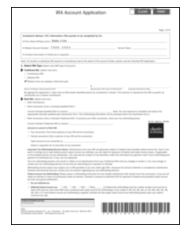


The company name is  Charles Schwab
Type of Form is  IRA Account Application
CheckBox Field:-  No checkbox field is present in the form


In [50]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/content/logo_detected_image.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()
print()
if prediction_dictionary[index1] in ['Charles Schwab', 'Merrill Lynch', 'Fidelity', 'American Funds']:
  print("The company name is ", prediction_dictionary[index1])
  print("Type of Form is ", prediction_dictionary[index2])
  print("CheckBox Field:- ", tick_box_field[0])
else:
  print("The company name is ", prediction_dictionary[index2])
  print("Type of form is ", prediction_dictionary[index1])
  print("CheckBox Field:- ", tick_box_field[0])